In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading of the database given by the professor 
# main content of the csv: 
# - generic data of the interviewed users (age, gender, education...)
# - answers to some questionaires (to be decided which ones to keep)
data = pd.read_csv('dataset.csv')

In [5]:
# inspection of the features 
for feature in data.columns:
    print(feature)
    
print('in total there are ' + str(len(data.columns)) + ' features')

age
gender
education
marital
income
phq_1
phq_2
phq_3
phq_4
phq_5
phq_6
phq_7
phq_8
phq_9
gad_1
gad_2
gad_3
gad_4
gad_5
gad_6
gad_7
eheals_1
eheals_2
eheals_3
eheals_4
eheals_5
eheals_6
eheals_7
eheals_8
heas_1
heas_2
heas_3
heas_4
heas_5
heas_6
heas_7
heas_8
heas_9
heas_10
heas_11
heas_12
heas_13
ccs_1
ccs_2
ccs_3
ccs_4
ccs_5
ccs_6
ccs_7
ccs_8
ccs_9
ccs_10
ccs_11
ccs_12
in total there are 54 features


In [6]:
# finding the missing values
missing_values = data.isnull().sum()
print(missing_values)

age          1
gender       0
education    1
marital      0
income       0
phq_1        0
phq_2        5
phq_3        1
phq_4        0
phq_5        0
phq_6        0
phq_7        1
phq_8        1
phq_9        1
gad_1        1
gad_2        0
gad_3        1
gad_4        1
gad_5        1
gad_6        1
gad_7        1
eheals_1     2
eheals_2     4
eheals_3     2
eheals_4     2
eheals_5     2
eheals_6     0
eheals_7     0
eheals_8     1
heas_1       1
heas_2       1
heas_3       2
heas_4       0
heas_5       0
heas_6       0
heas_7       0
heas_8       0
heas_9       1
heas_10      2
heas_11      0
heas_12      2
heas_13      1
ccs_1        2
ccs_2        0
ccs_3        1
ccs_4        4
ccs_5        2
ccs_6        3
ccs_7        0
ccs_8        0
ccs_9        0
ccs_10       0
ccs_11       0
ccs_12       0
dtype: int64


C:\Users\mcrin\AppData\Local\Temp\ipykernel_32164\1442236469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], bins=20, kde=False)


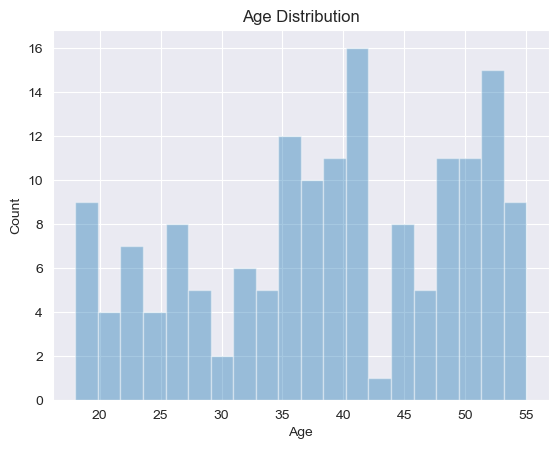

The most frequent age is 42.0 years old


In [7]:
# plotting age distribution
sns.distplot(data['age'], bins=20, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print('The most frequent age is ' + str(data['age'].mode()[0]) + ' years old')

# the missing age is replaced with the most common value 
data['age'].fillna(data['age'].mode()[0], inplace = True)

C:\Users\mcrin\AppData\Local\Temp\ipykernel_32164\3929369177.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data['gender'], bins = 4, kde = False, shrink = .8, height = 6, aspect = 1.5, palette = 'Set2')


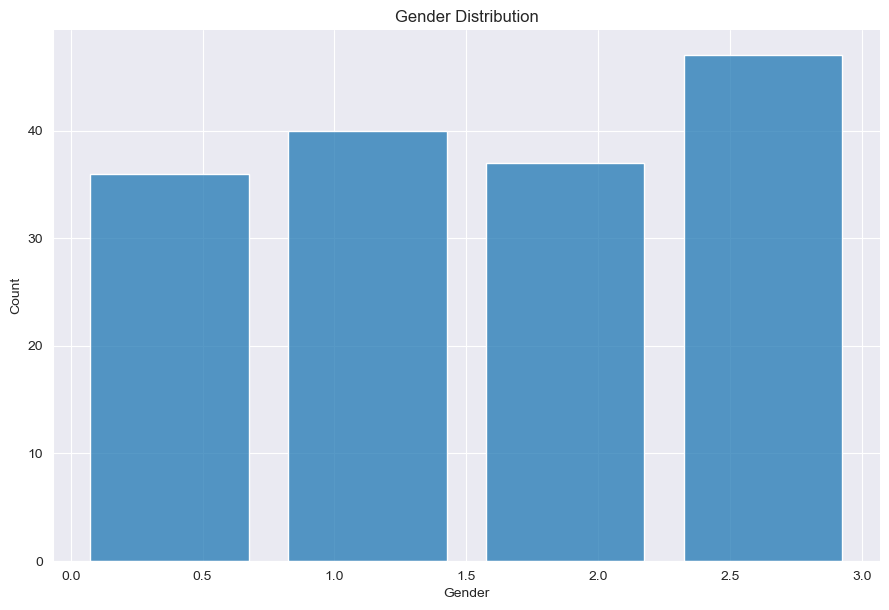

Most of the survey partecipants didn't mention their gender


In [8]:
# plotting gender distribution
sns.displot(data['gender'], bins = 4, kde = False, shrink = .8, height = 6, aspect = 1.5, palette = 'Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print("Most of the survey partecipants didn't mention their gender")

In [9]:
# nan values for the age filled with the mode (in this case is 42)
print(data['education'].value_counts(ascending = False))

# nan values for education filled with the mode (in this case is high school)
data['education'].fillna(data['education'].mode()[0], inplace = True)


13.0    56
8.0     36
18.0    34
22.0    17
5.0      8
25.0     8
Name: education, dtype: int64


In [10]:
# isolating the phq questionnaire
phq = data.columns[5:14]
phqdata = data[phq]

phqdata
# each feature related to phq goes from 0 to 3 being 0 the less stressed level and 3 the most stressed one
# the features of this category may be already considered as labeled since their value never goes out of such interval ([0-3]) 
# the strategy that may be applied in the filling of the nan can be filling the missing values with the most plausible number given the user at hand (if possible)

,phq_1,phq_2,phq_3,phq_4,phq_5,phq_6,phq_7,phq_8,phq_9
0,0,0.0,1.0,0,0,0,1.0,0.0,0.0
1,0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,0,0.0,0.0,0,1,0,0.0,0.0,0.0
3,2,1.0,0.0,0,2,0,0.0,0.0,0.0
4,0,NaN,0.0,0,1,2,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
155,0,2.0,0.0,2,0,2,0.0,1.0,0.0
156,2,1.0,2.0,0,2,1,0.0,0.0,1.0
157,0,0.0,2.0,1,0,0,0.0,0.0,2.0
158,0,NaN,1.0,0,0,0,0.0,0.0,0.0


In [16]:
# the most problematic feature seems to be phq_2, which has 5 missing values 
phqdata.isnull().sum()

phq_1    0
phq_2    5
phq_3    1
phq_4    0
phq_5    0
phq_6    0
phq_7    1
phq_8    1
phq_9    1
dtype: int64

In [26]:
# finding the rows that has missing values in pqhdata
phqdata[phqdata.isnull().any(axis=1)]

,phq_1,phq_2,phq_3,phq_4,phq_5,phq_6,phq_7,phq_8,phq_9
4,0,NaN,0.0,0,1,2,2.0,1.0,0.0
32,0,1.0,0.0,1,0,0,NaN,0.0,1.0
39,0,0.0,0.0,0,0,0,0.0,0.0,NaN
44,0,1.0,0.0,1,2,0,0.0,NaN,0.0
59,0,NaN,0.0,1,0,2,0.0,2.0,2.0
77,2,1.0,NaN,1,0,0,2.0,2.0,0.0
94,0,NaN,0.0,0,1,2,2.0,1.0,0.0
106,0,NaN,0.0,0,1,2,2.0,1.0,0.0
158,0,NaN,1.0,0,0,0,0.0,0.0,0.0


In [13]:
# isolating the gad questionnaire
gad = data.columns[14:21]
gadata = data[gad]
gadata

,gad_1,gad_2,gad_3,gad_4,gad_5,gad_6,gad_7
0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,1.0,1,0.0,0.0,0.0,0.0,1.0
2,0.0,1,1.0,0.0,1.0,0.0,1.0
3,3.0,3,2.0,3.0,3.0,2.0,3.0
4,2.0,0,2.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
155,3.0,0,1.0,3.0,0.0,3.0,3.0
156,0.0,1,2.0,0.0,2.0,0.0,2.0
157,0.0,2,0.0,1.0,1.0,0.0,2.0
158,0.0,0,0.0,0.0,0.0,1.0,1.0


In [17]:
gadata.isnull().sum()

gad_1    1
gad_2    0
gad_3    1
gad_4    1
gad_5    1
gad_6    1
gad_7    1
dtype: int64

In [23]:
# finding the rows that has missing values in gadata
gadata[gadata.isnull().any(axis=1)]

,gad_1,gad_2,gad_3,gad_4,gad_5,gad_6,gad_7
22,3.0,3,3.0,NaN,1.0,3.0,3.0
36,3.0,3,3.0,1.0,3.0,NaN,3.0
57,NaN,3,1.0,3.0,3.0,3.0,3.0
62,0.0,0,1.0,1.0,NaN,1.0,2.0
101,0.0,1,NaN,1.0,0.0,0.0,0.0
154,1.0,1,0.0,0.0,0.0,0.0,NaN


In [14]:
# isolating the eheals questionnaire
eheals = data.columns[21:29]
eheals = data[eheals]
eheals

,eheals_1,eheals_2,eheals_3,eheals_4,eheals_5,eheals_6,eheals_7,eheals_8
0,3.0,NaN,3.0,2.0,1.0,0,2,2.0
1,2.0,4.0,4.0,4.0,4.0,4,0,3.0
2,0.0,4.0,2.0,4.0,3.0,3,4,0.0
3,5.0,5.0,5.0,5.0,5.0,5,5,5.0
4,5.0,5.0,0.0,0.0,5.0,5,5,4.0
...,...,...,...,...,...,...,...,...
155,5.0,3.0,5.0,5.0,5.0,5,5,5.0
156,3.0,5.0,5.0,5.0,5.0,0,3,5.0
157,5.0,5.0,5.0,5.0,5.0,3,4,0.0
158,4.0,3.0,3.0,4.0,1.0,3,4,4.0


In [18]:
eheals.isnull().sum()

eheals_1    2
eheals_2    4
eheals_3    2
eheals_4    2
eheals_5    2
eheals_6    0
eheals_7    0
eheals_8    1
dtype: int64

In [25]:
# finding the rows that has missing values in eheals 
eheals[eheals.isnull().any(axis=1)]

,eheals_1,eheals_2,eheals_3,eheals_4,eheals_5,eheals_6,eheals_7,eheals_8
0,3.0,NaN,3.0,2.0,1.0,0,2,2.0
9,NaN,0.0,5.0,4.0,2.0,5,5,4.0
11,5.0,4.0,5.0,NaN,5.0,2,5,5.0
24,1.0,5.0,5.0,5.0,NaN,5,5,5.0
25,NaN,3.0,5.0,5.0,1.0,1,5,4.0
27,5.0,5.0,5.0,5.0,NaN,5,5,5.0
33,5.0,NaN,1.0,5.0,5.0,4,5,5.0
70,4.0,NaN,4.0,4.0,1.0,4,1,3.0
81,5.0,5.0,NaN,3.0,5.0,5,5,5.0
108,0.0,4.0,NaN,0.0,2.0,3,2,4.0


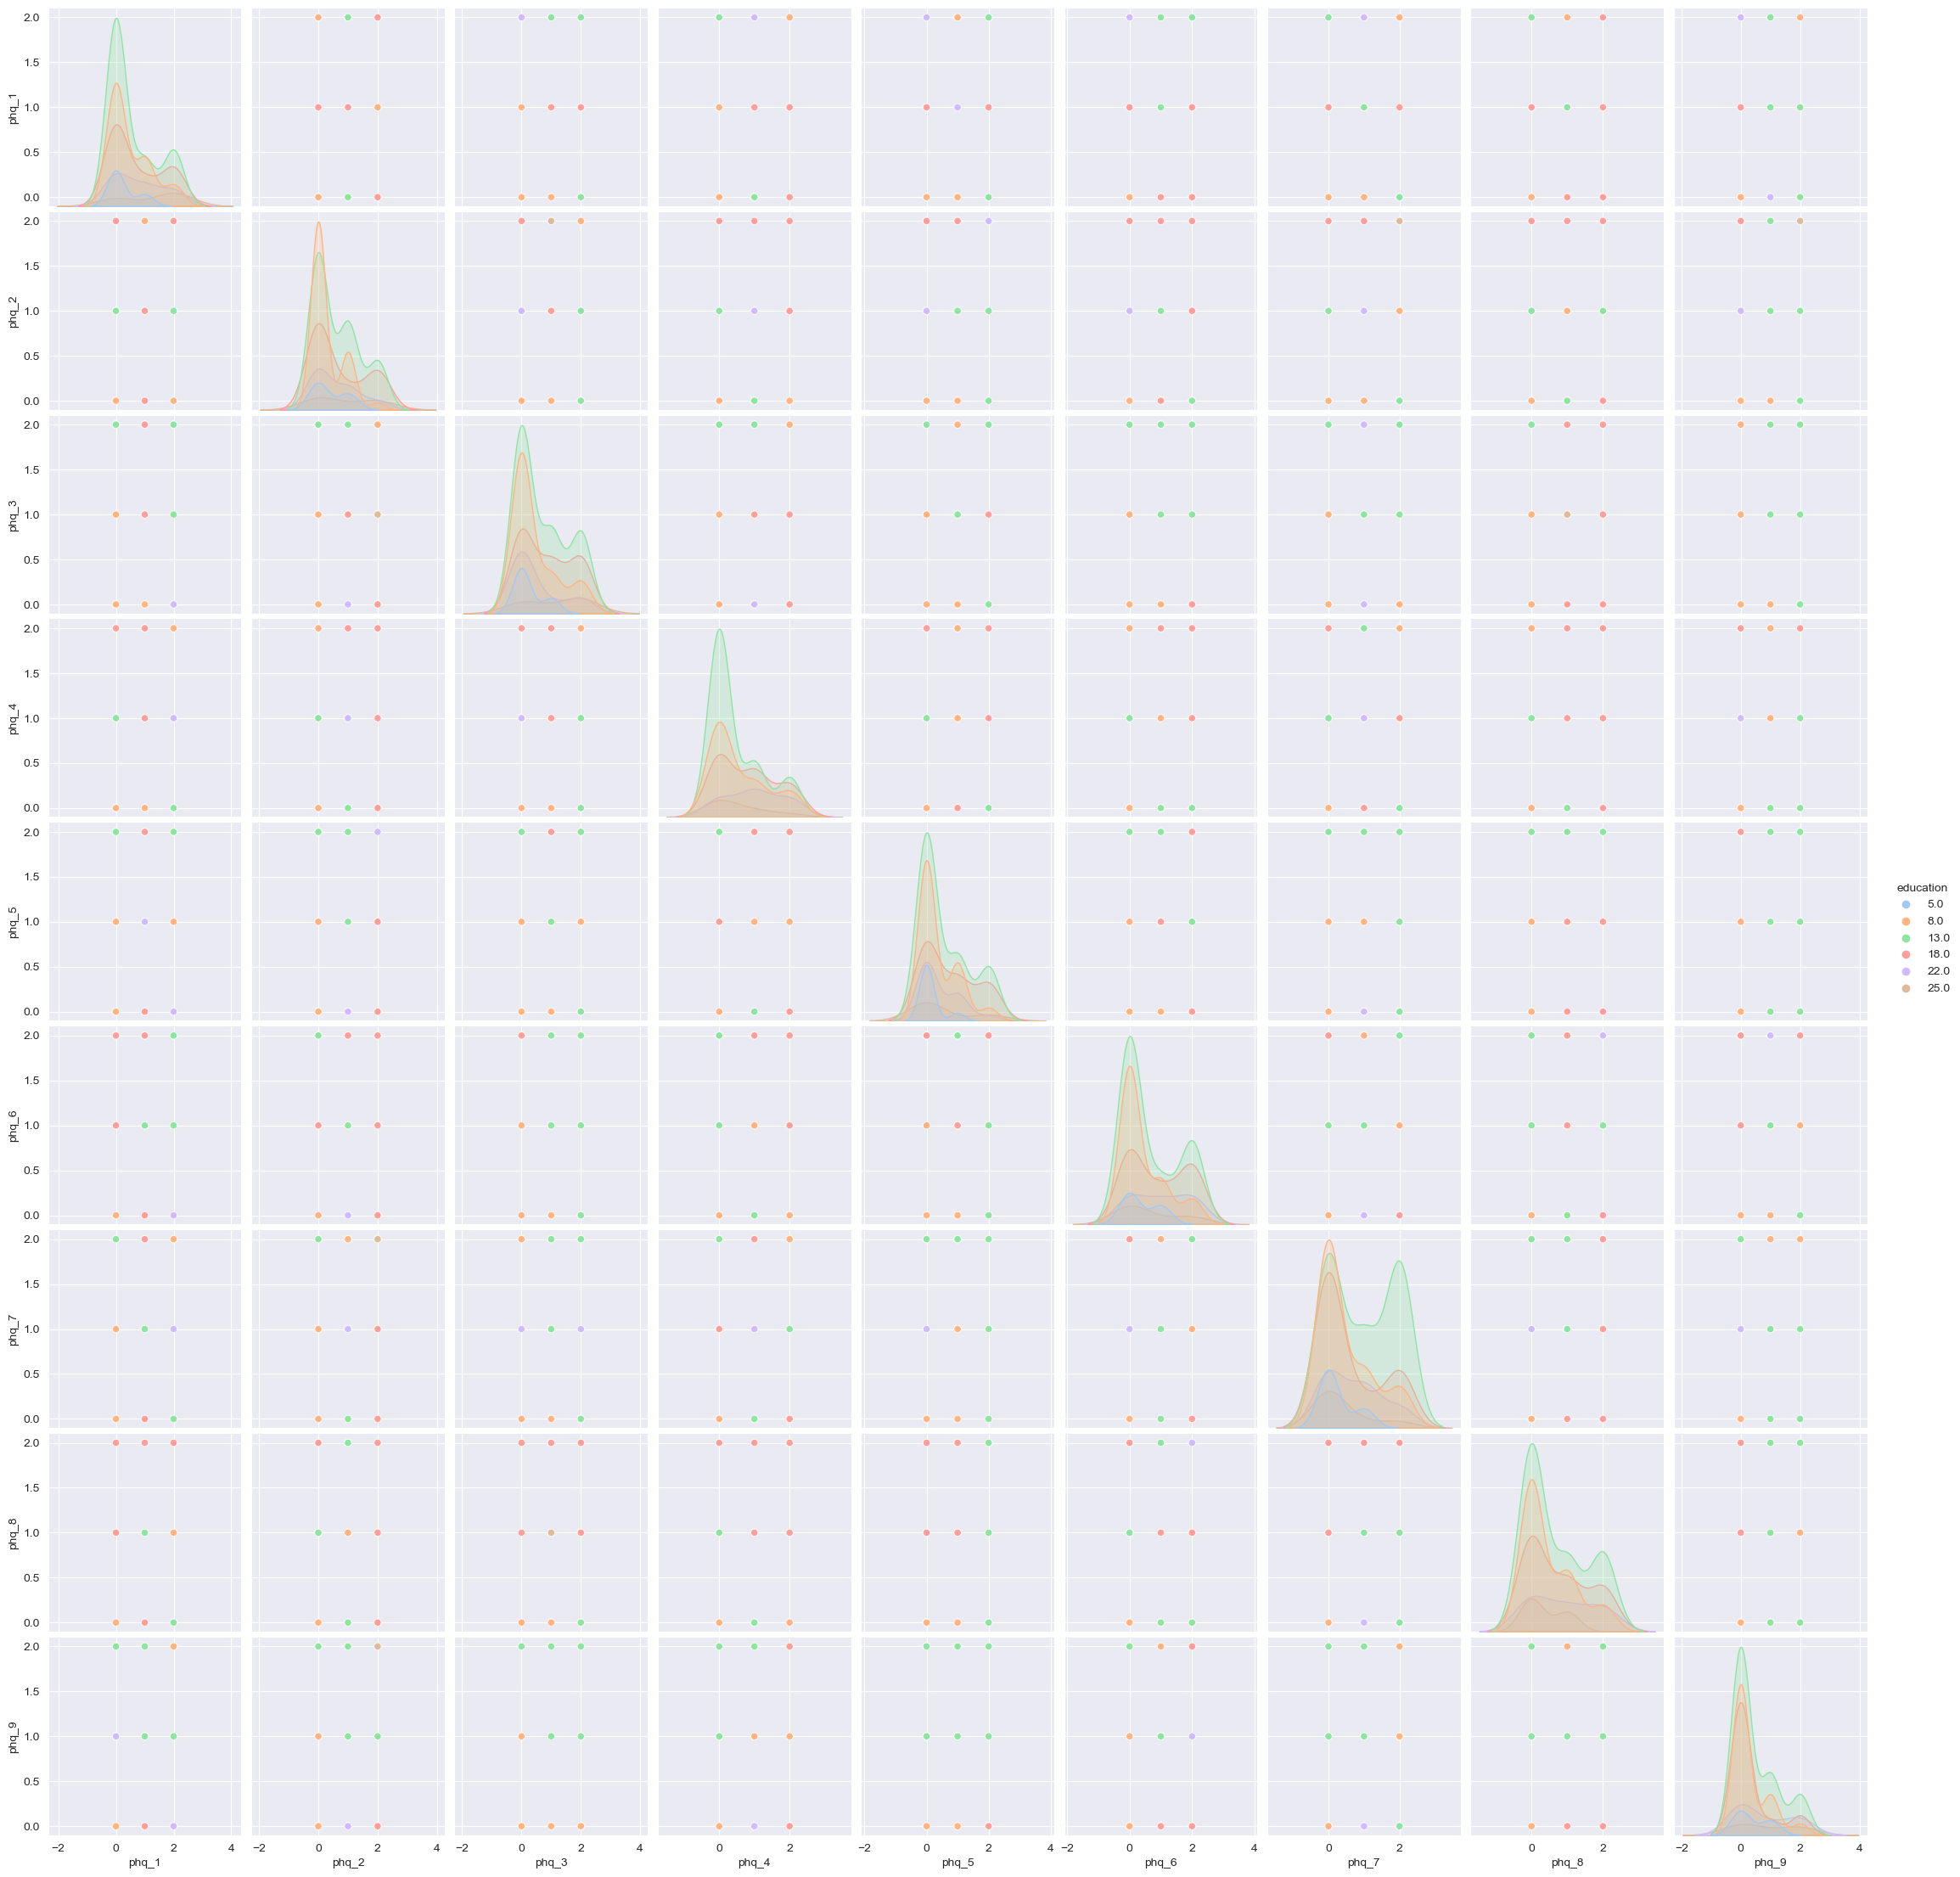

In [30]:
# multivariate analysis of education and features from phq
sns.pairplot(data, vars = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9'], hue = 'education', palette = 'pastel')
plt.show()

In [ ]:
# multivariate analysis of education and features from phq
sns.pairplot(data, vars = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9'], hue = 'gender', palette = 'pastel')
plt.show()